# Exercise 6.2 - Exploring relationships

### This script contains the following:

#### 1. Import Visualization Libraries and Data
#### 2. Explore Relationships
     Step 3 - Create a correlation matrix heatmap
     Step 4 - Create a scatterplot(s)
     Step 5 - Create a pair plot of the entire data set
     Step 6 - Create a categorical plot
#### 3. Create a dataframe excluding high income customers    

### 1. Import Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\jomok\Documents\Career Foundry\Achievement 6\09-2023 FHL Bank Data Analysis'

In [4]:
# Import data

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'FHL_bank_data_merged.pkl'))

### 2. Explore Relationships

### Step 3 - Create a correlation matrix heatmap:

In [5]:
df.columns

Index(['County', 'State Code', 'State', 'Year', 'LoanCharacteristicsID',
       'Total Monthly Income Amount', 'Borrower Count', 'Borrower 1 Race Type',
       'Borrower 1 Age', 'Borrower 2 Age', 'Property Unit Count',
       'Note Rate Percent', 'Note Amount', 'Total Debt Expense Ratio Percent',
       'Borrower 1 Credit Score Value', 'Borrower 2 Credit Score Value',
       'Loan Purpose', 'Mortgage Type', 'First Time Homebuyer',
       'Borrower 1 Race', 'Borrower 2 Race', 'Borrower 1 Gender',
       'Borrower 2 Gender', 'Property Usage', 'Property Type', 'Loan Count',
       'Monthly Income Range', 'Age Range', 'Note Rate Percent Range'],
      dtype='object')

In [6]:
# Create a subset of columns

sub = df[['State', 'Borrower 1 Age', 'Total Monthly Income Amount', 'Borrower 1 Race', 'Borrower 1 Credit Score Value', 'Note Amount']]

In [7]:
sub

,State,Borrower 1 Age,Total Monthly Income Amount,Borrower 1 Race,Borrower 1 Credit Score Value,Note Amount
0,Vermont,34.0,7308,White,1,319113
1,Vermont,36.0,7416,White,3,248005
2,Vermont,34.0,5143,White,2,211105
3,Vermont,42.0,8866,White,4,210000
4,Maine,66.0,15240,White,5,233200
...,...,...,...,...,...,...
101200,Colorado,43.0,7672,White,5,375000
101201,Colorado,30.0,7067,White,5,439890
101202,Colorado,24.0,9475,White,4,386500
101203,Colorado,36.0,43000,White,4,385500


C:\Users\jomok\AppData\Local\Temp\ipykernel_16336\4029816704.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to


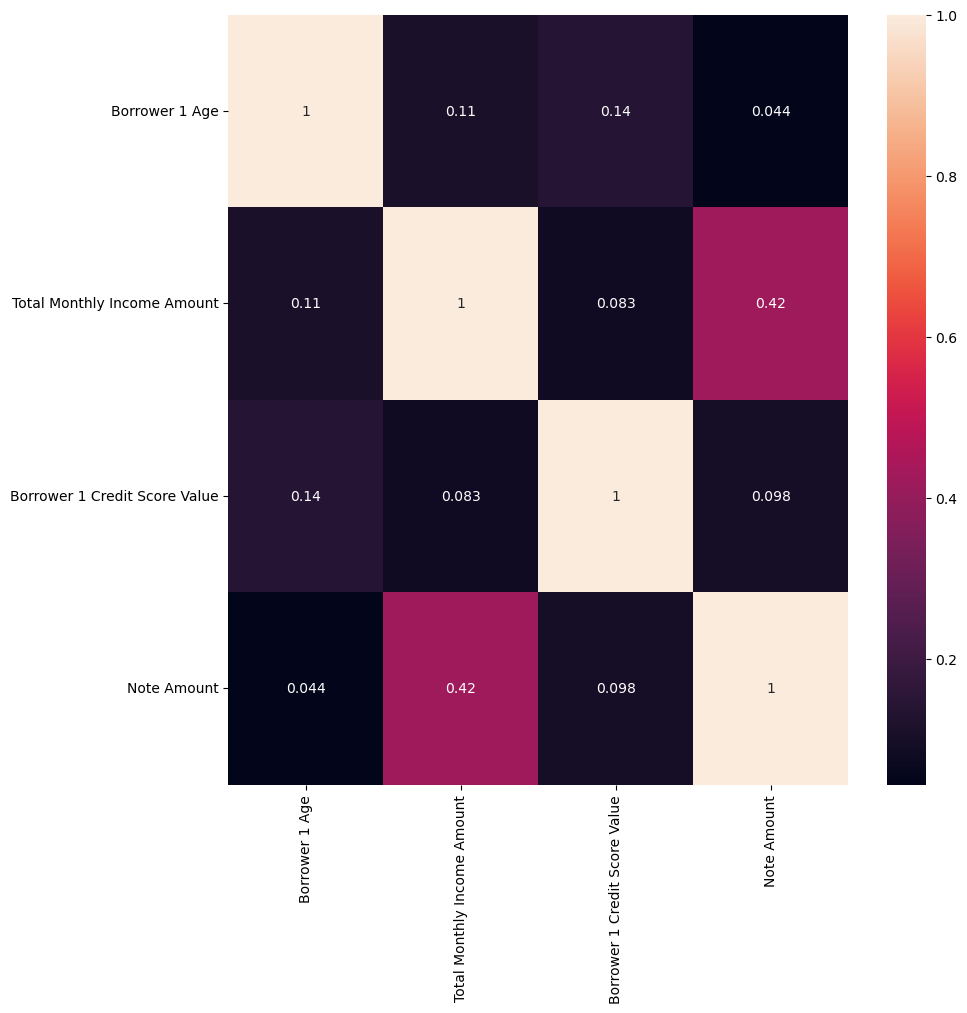

In [8]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Discuss what the coefficients in the plot mean in terms of the relationship between the variables:
1)Borrower 1 Age relationship to:
    Total Monthly Income Amount - 0.031 = no relationship
    Borrower 1 Credit Score Value - 0.096 = weak positive relationship; the older the borrower, the higher the credit score value
    Note Amount - -0.022 = no relationship
2)Total Monthly Income Amount relationship to:
    Borrower 1 Credit Score Value - 0.053 = weak positive relationship; the higher the total monthly income, the higher the credit score value
    Note Amount - 0.31 = weak/moderate positive relationship; the higher the total monthly income, the higher the note amount
3)Borrower 1 Credit Score Value relationship to:
    Note Amount - 0.052 = weak positive relationship; the higher the credit score value, the higher the note amount

### Step 4 - Create a scatterplot(s):

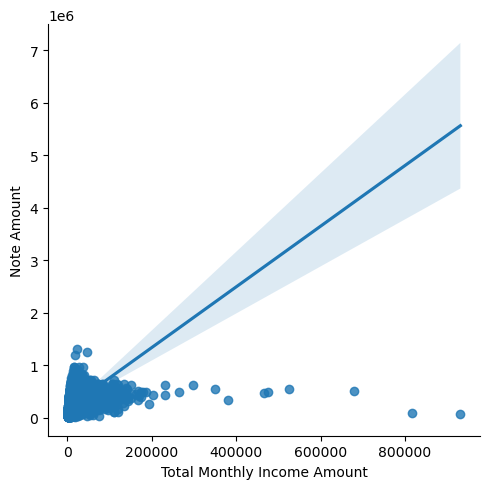

In [9]:
# Create a scatterplot for the "Total Monthly Income Amount" and "Note Amount" columns in seaborn

sns.lmplot(x = 'Total Monthly Income Amount', y = 'Note Amount', data = df)

There is a general positive relationship between the two columns, but there are many data points far away from the trend line, indicating a great degree of variability and showing that the relationship between "Note Amount" and "Total Monthly Income Amount" variables is not purely linear.  The scatterplot also shows outlier data, where the "Total Monthly Income Amount" is greater than 400k.

### Step 5 - Create a pair plot of the entire data set:

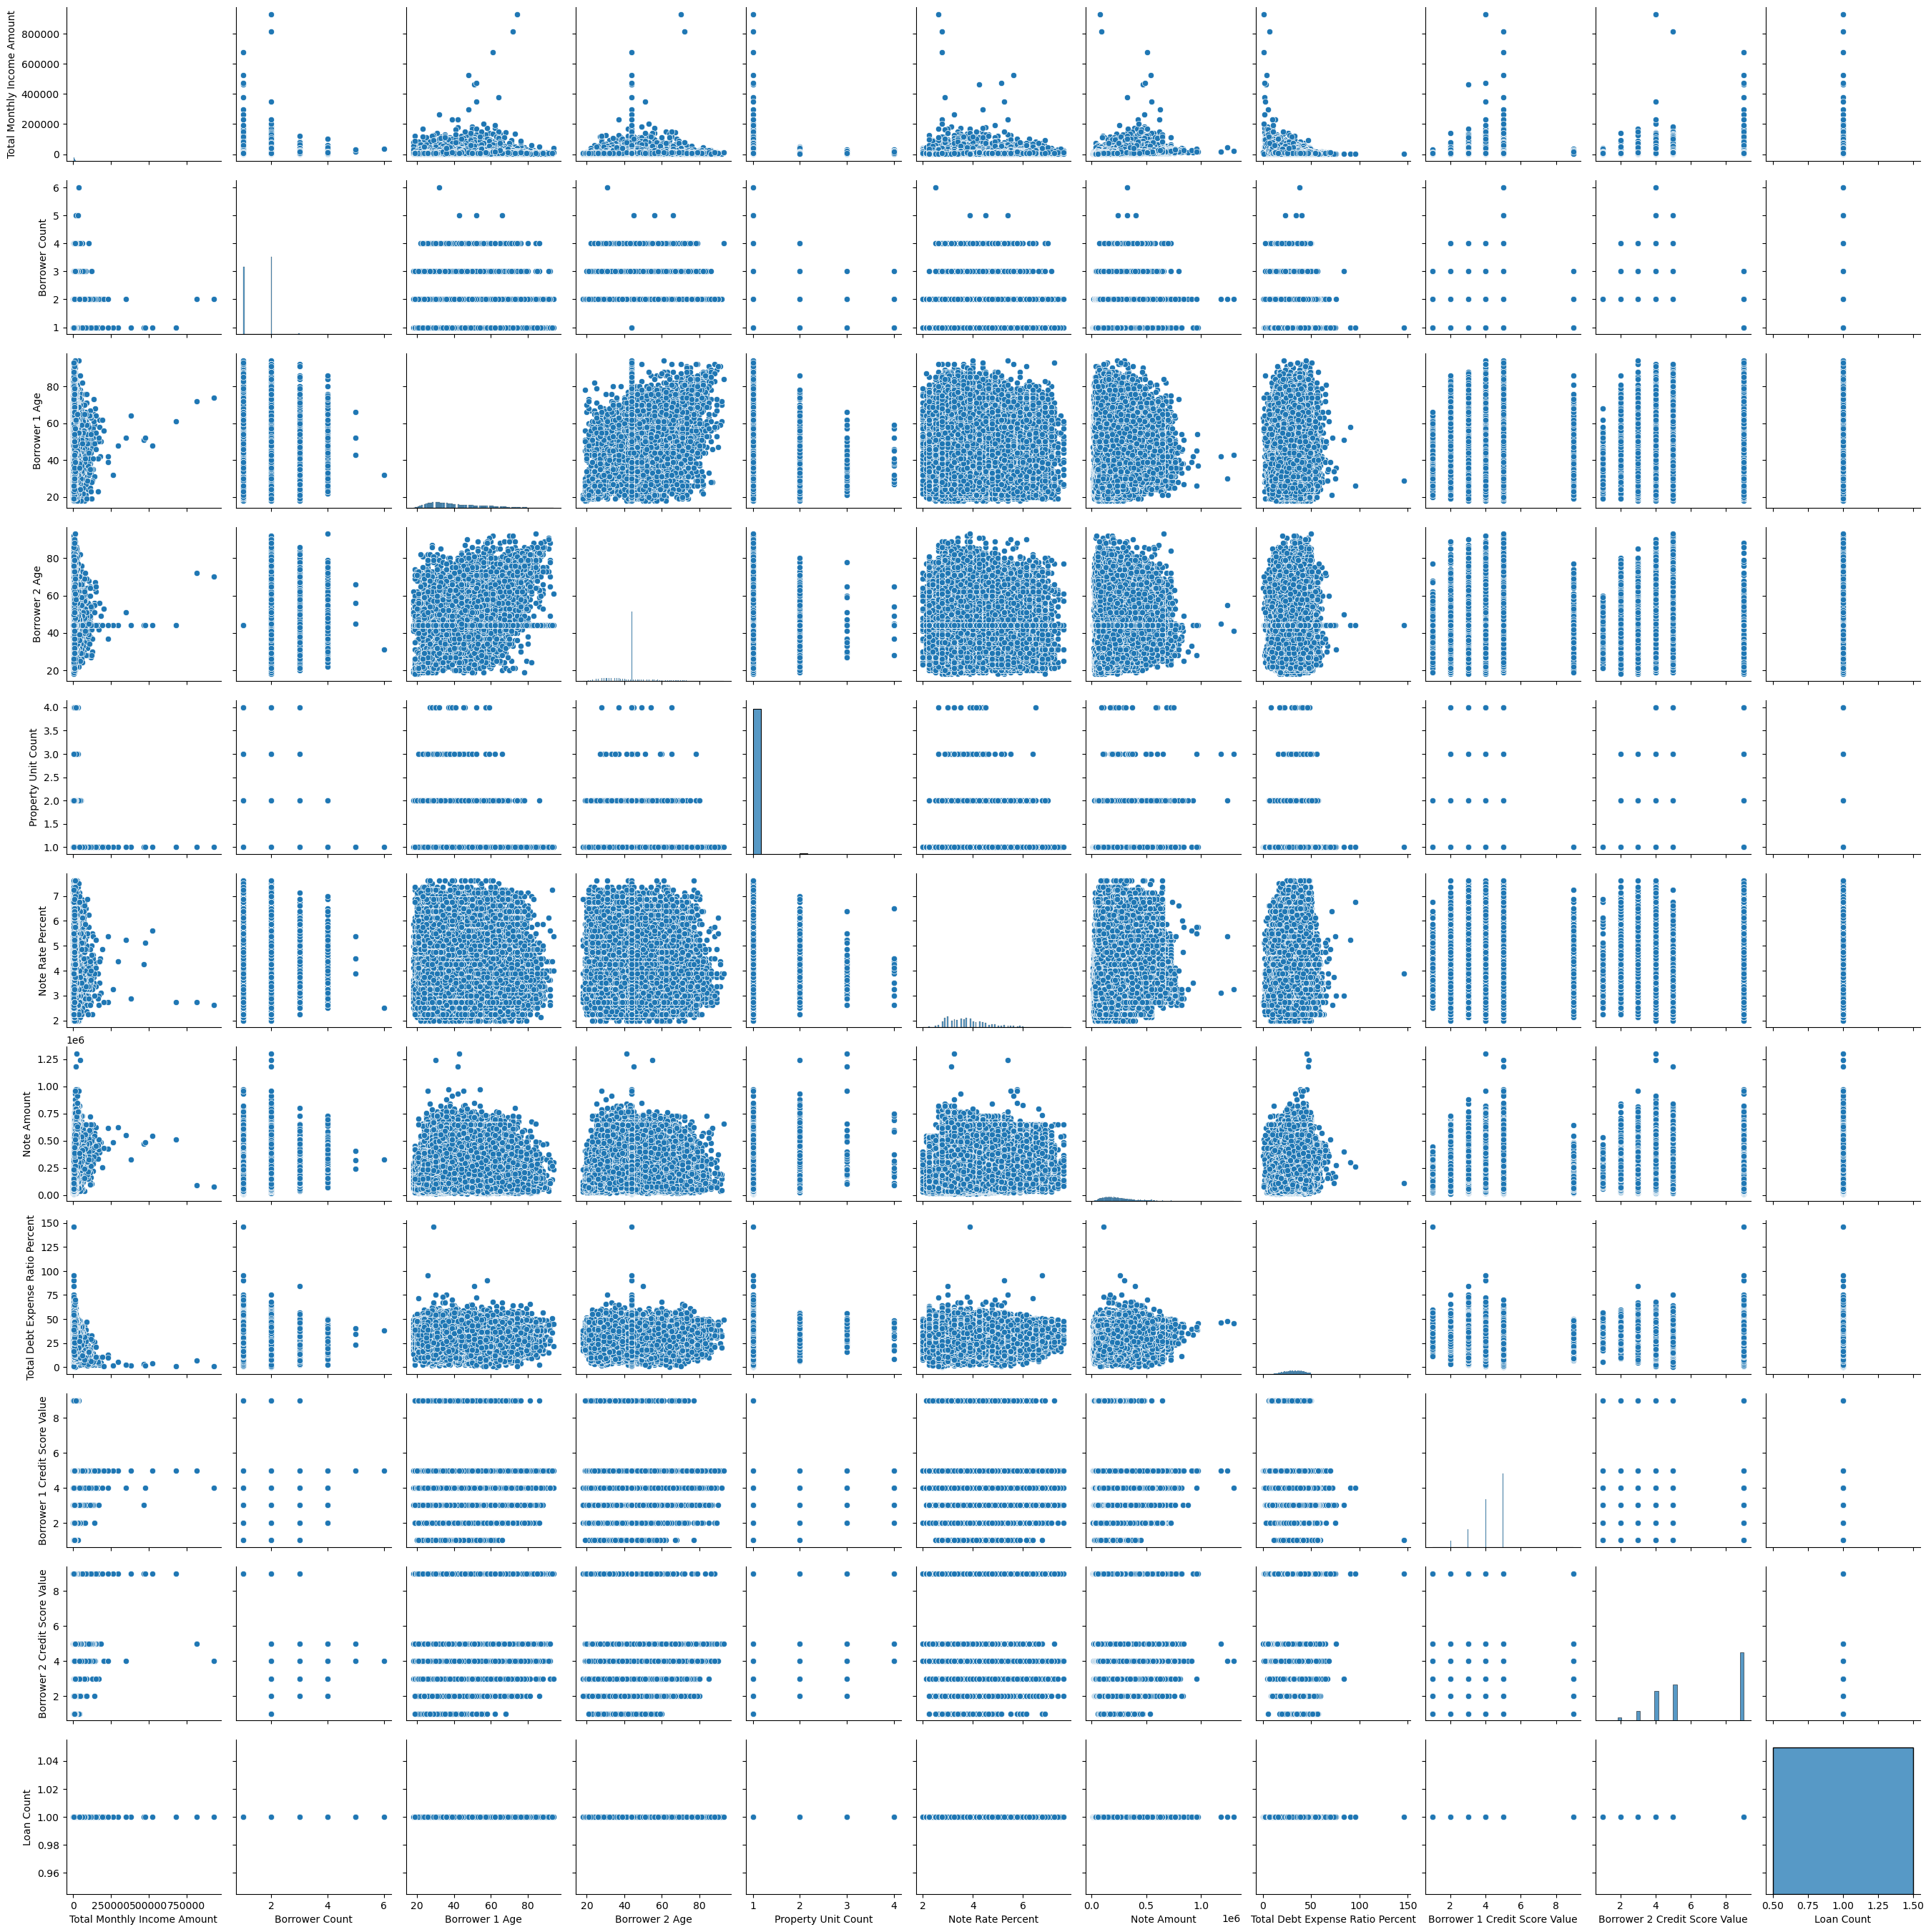

In [10]:
# Create a pair plot 

g = sns.pairplot(df)

It is really hard to see even the variable names with the entire dataframe. I kept only variables that I wanted to use and created another pair plot with:  State, Borrower 1 Age, Total Monthly Income Amount, Borrower Race, Borrower 1 Credit score Value and the Note Amount variables.

### Step 5 - Create a pair plot:

In [11]:
# Keep only the variables you want to use in the pair plot

sub_2 = df[['State', 'Borrower 1 Age', 'Total Monthly Income Amount', 'Borrower 1 Race', 'Borrower 1 Credit Score Value', 'Note Amount', 'Loan Count']]

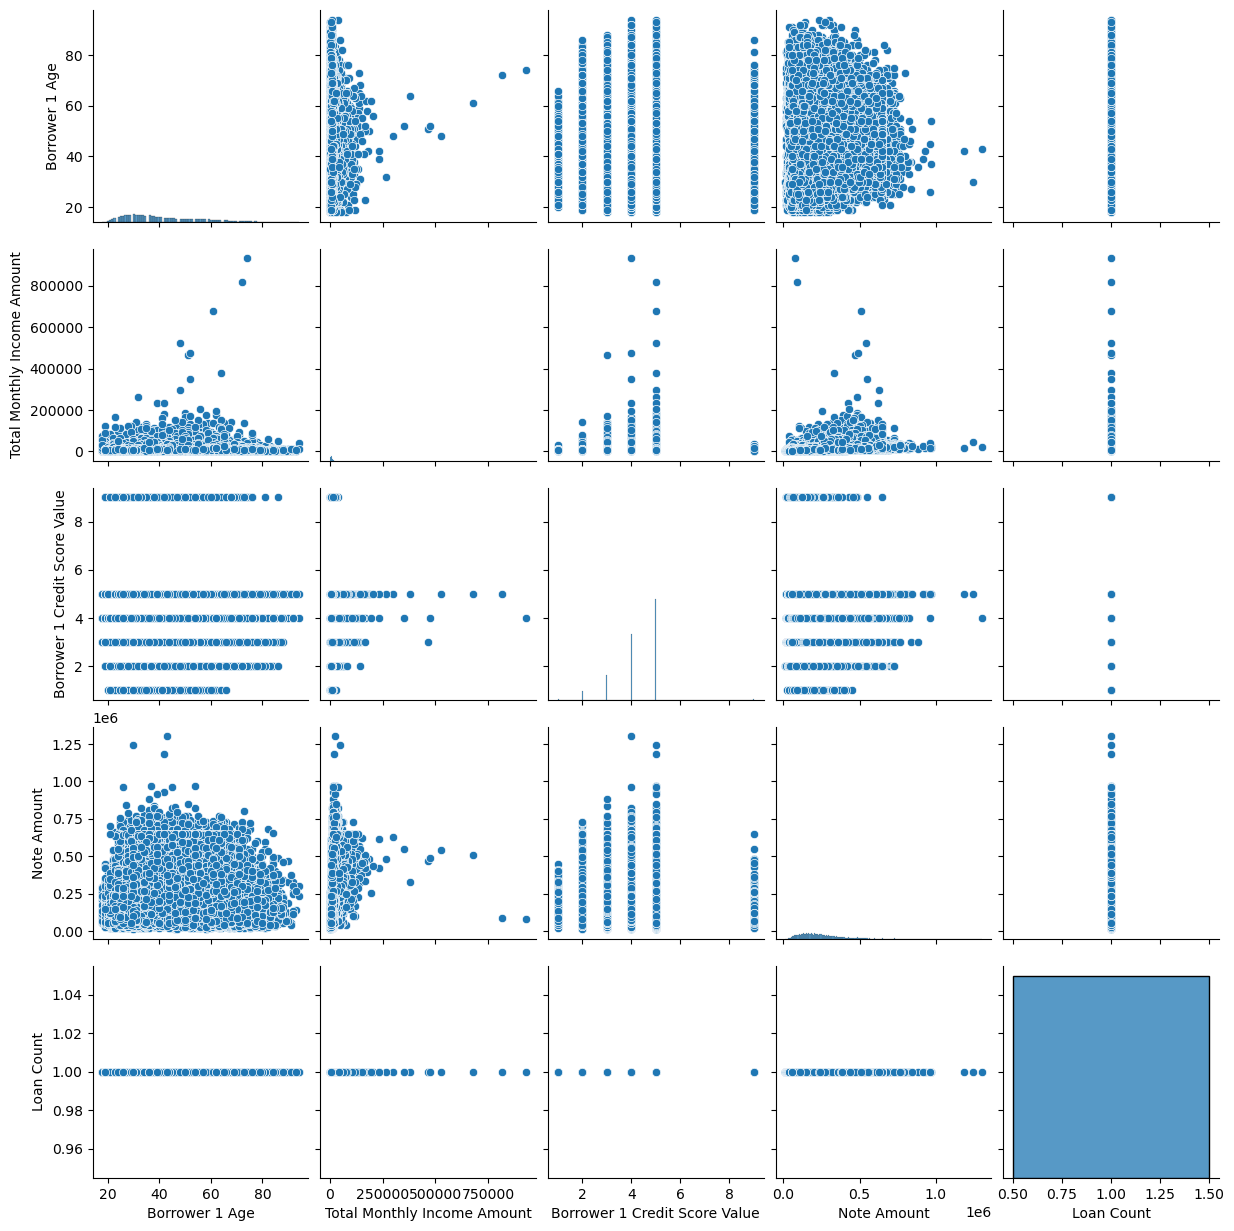

In [12]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### Step 6 - Create a categorical plot:

##### Creating a categorical variable that splits the "Note Amount" column into categories

<Axes: xlabel='Note Amount', ylabel='Count'>

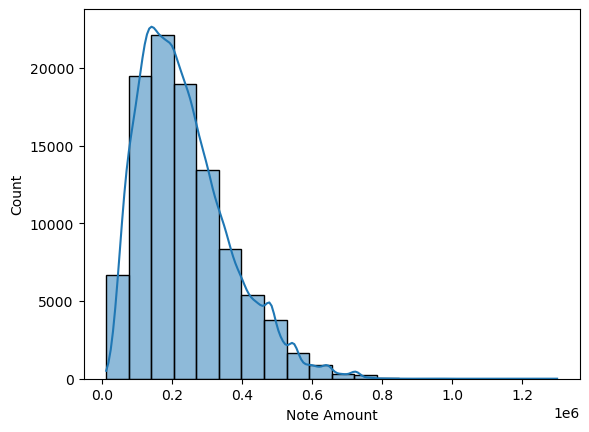

In [13]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df['Note Amount'], bins = 20, kde = True)

In [14]:
df.loc[df['Note Amount'] < 100000, 'Price category'] = 'Low price'

In [15]:
df.loc[(df['Note Amount'] >= 100000) & (df['Note Amount'] < 500000), 'Price category'] = 'Middle price'

In [16]:
df.loc[df['Note Amount'] >= 500000, 'Price category'] = 'High price'

In [17]:
df['Price category'].value_counts(dropna = False)

Middle price    84933
Low price       12107
High price       4165
Name: Price category, dtype: int64

In [18]:
df.columns

Index(['County', 'State Code', 'State', 'Year', 'LoanCharacteristicsID',
       'Total Monthly Income Amount', 'Borrower Count', 'Borrower 1 Race Type',
       'Borrower 1 Age', 'Borrower 2 Age', 'Property Unit Count',
       'Note Rate Percent', 'Note Amount', 'Total Debt Expense Ratio Percent',
       'Borrower 1 Credit Score Value', 'Borrower 2 Credit Score Value',
       'Loan Purpose', 'Mortgage Type', 'First Time Homebuyer',
       'Borrower 1 Race', 'Borrower 2 Race', 'Borrower 1 Gender',
       'Borrower 2 Gender', 'Property Usage', 'Property Type', 'Loan Count',
       'Monthly Income Range', 'Age Range', 'Note Rate Percent Range',
       'Price category'],
      dtype='object')

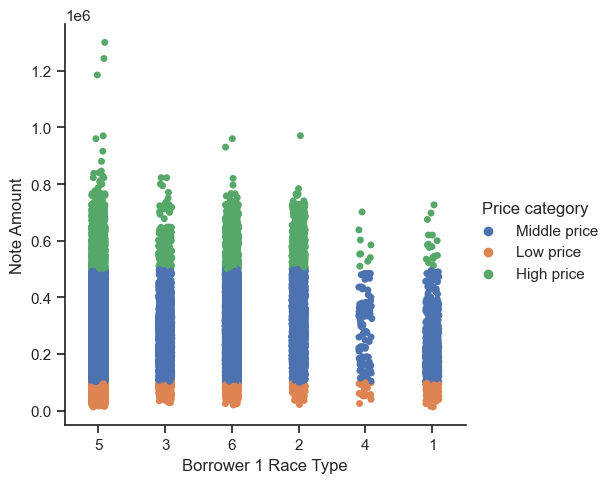

In [19]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Borrower 1 Race Type", y="Note Amount", hue="Price category", data=df)

For Low and Middle price home purchases, it seems to be comparable across all race types:  5 - White, 3 - Black/African-American, 6 - No information provided, 2 - Asian, 4 - Native Hawaiian, 1 - American Indian.  For the high price home purchases, there are noticeably less cases for Native Hawaiians and American Indians, followed by African Americans.  The highest note amounts are in the White followed by the Asian race types.

## 3. Create a dataframe excluding high income customers

In [20]:
# Create a flag to assign an activity label customers based on number of orders

df.loc[df['Total Monthly Income Amount'] >= 400000, 'Monthly Income Flag'] = 'High Income Borrower'
df.loc[df['Total Monthly Income Amount'] < 400000, 'Monthly Income Flag'] = 'Normal Income Borrower'

In [21]:
# Print frequency of the "Monthly Income Flag" column

df['Monthly Income Flag'].value_counts(dropna = False)

Normal Income Borrower    101199
High Income Borrower           6
Name: Monthly Income Flag, dtype: int64

In [22]:
# Check output

df[['LoanCharacteristicsID', 'Monthly Income Flag', 'State']].head(60)

,LoanCharacteristicsID,Monthly Income Flag,State
0,2407198,Normal Income Borrower,Vermont
1,2407199,Normal Income Borrower,Vermont
2,2407200,Normal Income Borrower,Vermont
3,2407201,Normal Income Borrower,Vermont
4,2407202,Normal Income Borrower,Maine
5,2407203,Normal Income Borrower,Maine
6,2407205,Normal Income Borrower,Massachusetts
7,2407208,Normal Income Borrower,Massachusetts
8,2407209,Normal Income Borrower,Massachusetts
9,2407210,Normal Income Borrower,Massachusetts


In [23]:
# Create a subset of normal income customers

df_sub_income = df[df['Monthly Income Flag']=='Normal Income Borrower']

In [24]:
# Check output

df_sub_income.head()

,County,State Code,State,Year,LoanCharacteristicsID,Total Monthly Income Amount,Borrower Count,Borrower 1 Race Type,Borrower 1 Age,Borrower 2 Age,...,Borrower 1 Gender,Borrower 2 Gender,Property Usage,Property Type,Loan Count,Monthly Income Range,Age Range,Note Rate Percent Range,Price category,Monthly Income Flag
0,Chittenden,50,Vermont,2019,2407198,7308,1,5,34.0,44.0,...,Female,No Co-Borrower,Principal Residence,Single family detached,1,"5,000 - 11,999",Under 35,4 - 4.99%,Middle price,Normal Income Borrower
1,Chittenden,50,Vermont,2019,2407199,7416,2,5,36.0,33.0,...,Female,Male,Principal Residence,Single family detached,1,"5,000 - 11,999",35 - 44,4 - 4.99%,Middle price,Normal Income Borrower
2,Lamoille,50,Vermont,2019,2407200,5143,2,5,34.0,36.0,...,Male,Female,Principal Residence,Single family detached,1,"5,000 - 11,999",Under 35,4 - 4.99%,Middle price,Normal Income Borrower
3,Orange,50,Vermont,2019,2407201,8866,2,5,42.0,43.0,...,Male,Female,Principal Residence,Single family detached,1,"5,000 - 11,999",35 - 44,4 - 4.99%,Middle price,Normal Income Borrower
4,York,23,Maine,2019,2407202,15240,1,5,66.0,44.0,...,Female,No Co-Borrower,Principal Residence,Single family detached,1,"12,000+",65+,4 - 4.99%,Middle price,Normal Income Borrower


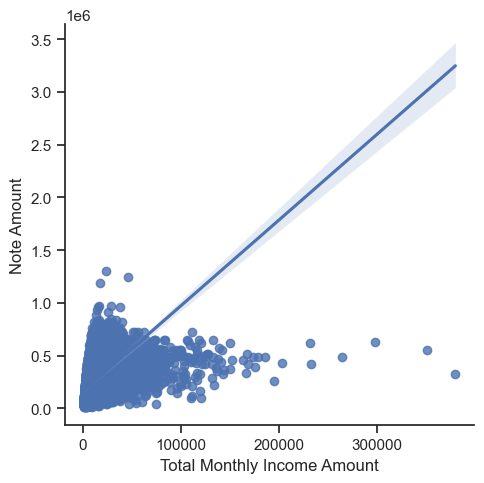

In [25]:
# Create a scatterplot for the "Total Monthly Income Amount" and "Note Amount" columns in seaborn

sns.lmplot(x = 'Total Monthly Income Amount', y = 'Note Amount', data = df_sub_income)

In [26]:
# Check shape

df_sub_income.shape

(101199, 31)

In [27]:
# Export subset of normal income borrowers to pkl

df_sub_income.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'FHL_bank_normal_income.pkl'))

In [28]:
# Create a subset of normal income customers

df_sub_high_income = df[df['Monthly Income Flag']=='High Income Borrower']

In [29]:
# Check shape

df_sub_high_income.shape

(6, 31)

In [30]:
# Check output

df_sub_high_income.head(26)

,County,State Code,State,Year,LoanCharacteristicsID,Total Monthly Income Amount,Borrower Count,Borrower 1 Race Type,Borrower 1 Age,Borrower 2 Age,...,Borrower 1 Gender,Borrower 2 Gender,Property Usage,Property Type,Loan Count,Monthly Income Range,Age Range,Note Rate Percent Range,Price category,Monthly Income Flag
55872,Fairfax,51,Virginia,2020,2516283,465969,1,5,51.0,44.0,...,Male,No Co-Borrower,Second Home,Single family detached,1,"12,000+",45 - 54,4 - 4.99%,Middle price,High Income Borrower
60357,Lancaster,31,Nebraska,2020,2563972,679796,1,5,61.0,44.0,...,Male,No Co-Borrower,Principal Residence,Single family detached,1,"12,000+",55 - 64,Less than 3%,High price,High Income Borrower
73576,Schoolcraft,26,Michigan,2021,2671630,817114,2,6,72.0,72.0,...,Male,Female,Principal Residence,Single family detached,1,"12,000+",65+,Less than 3%,Low price,High Income Borrower
86153,Henderson,21,Kentucky,2022,2729168,931300,2,6,74.0,70.0,...,Male,Female,Principal Residence,Single family detached,1,"12,000+",65+,Less than 3%,Low price,High Income Borrower
89281,Hood,48,Texas,2022,2734451,474218,1,5,52.0,44.0,...,Male,No Co-Borrower,Second Home,PUD,1,"12,000+",45 - 54,5 - 5.99%,Middle price,High Income Borrower
94458,Edmunds,46,South Dakota,2022,2745204,525535,1,5,48.0,44.0,...,Male,No Co-Borrower,Second Home,Single family detached,1,"12,000+",45 - 54,5 - 5.99%,High price,High Income Borrower
